<b> Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from datetime import datetime
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<b> Read the dataset </b>

In [2]:
df = pd.read_csv("/Users/avantikagaur/Downloads/data.csv", parse_dates=['timestamp'])

<b> Preliminary Examination of Dataset </b>

In [3]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16013 non-null  object        
 2   lighting_energy               16048 non-null  object        
 3   zone1_temperature             15990 non-null  object        
 4   zone1_humidity                16056 non-null  object        
 5   zone2_temperature             16004 non-null  object        
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [5]:
print("Dataset shape: ", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows: ", df.duplicated().sum())

Dataset shape:  (16857, 29)

Column Data Types:
 timestamp                       datetime64[ns]
equipment_energy_consumption            object
lighting_energy                         object
zone1_temperature                       object
zone1_humidity                          object
zone2_temperature                       object
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humid

In [6]:
df['equipment_energy_consumption'] = df['equipment_energy_consumption'].apply(pd.to_numeric, errors='coerce')
df['lighting_energy'] = df['lighting_energy'].apply(pd.to_numeric, errors='coerce')
df['zone1_temperature'] = df['zone1_temperature'].apply(pd.to_numeric, errors='coerce')
df['zone1_humidity'] = df['zone1_humidity'].apply(pd.to_numeric, errors='coerce')
df['zone2_temperature'] = df['zone2_temperature'].apply(pd.to_numeric, errors='coerce')
df['zone2_temperature'] = df['zone2_temperature'].apply(pd.to_numeric, errors='coerce')

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month
df['day_of_week'] = df['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df['hour'] = df['timestamp'].dt.hour
df.drop(columns=["timestamp"], inplace=True)

In [8]:
df.fillna(df.median(), inplace=True)
df.drop_duplicates(inplace=True)

<b> Exploratory data analysis (EDA) </b>

<b> Skewness Check </b>

In [9]:
skewed_features = df.drop(columns=['equipment_energy_consumption']).apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[abs(skewed_features) > 1].sort_values(ascending=False)
print("Highly skewed features (|skew| > 1):")
print(skewed_features)

Highly skewed features (|skew| > 1):
zone5_humidity     -1.247352
outdoor_humidity   -2.095086
zone7_humidity     -2.654817
zone8_humidity     -3.076669
zone4_humidity     -3.437459
zone9_humidity     -4.473849
zone2_humidity     -4.502179
zone1_humidity     -4.763142
zone3_humidity     -5.568526
dtype: float64


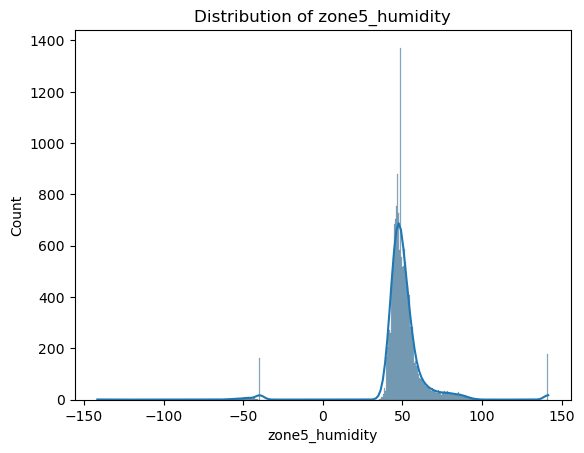

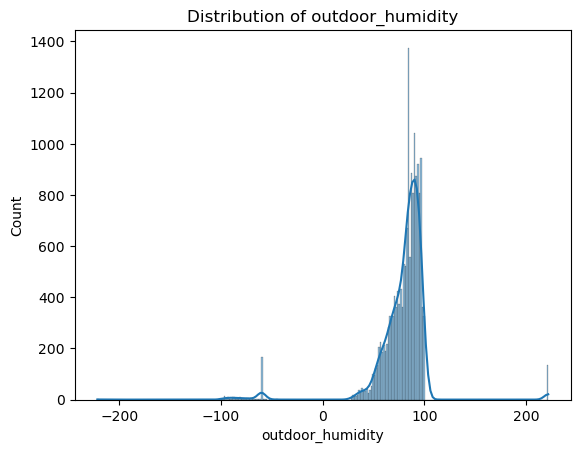

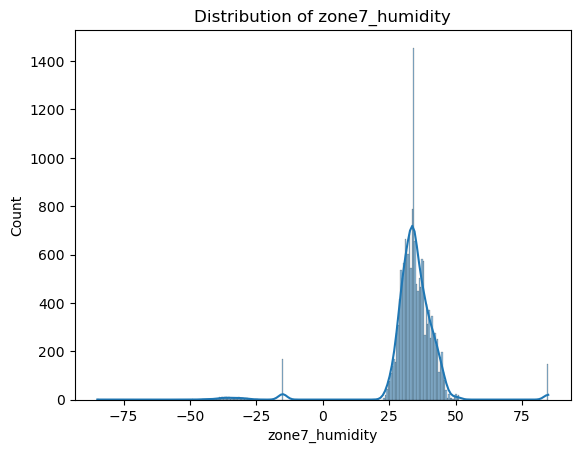

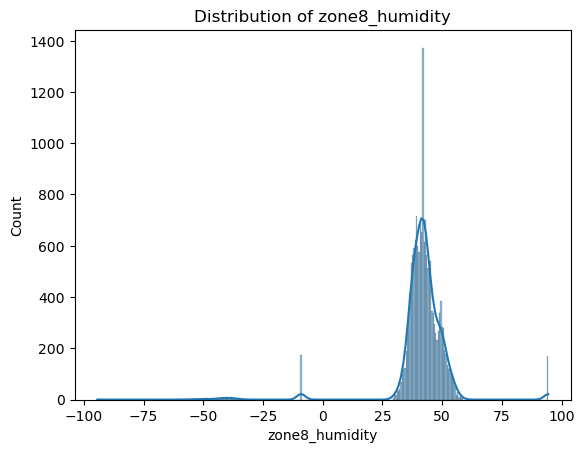

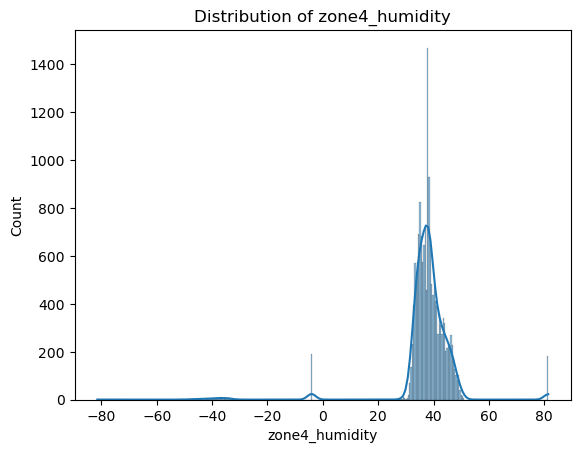

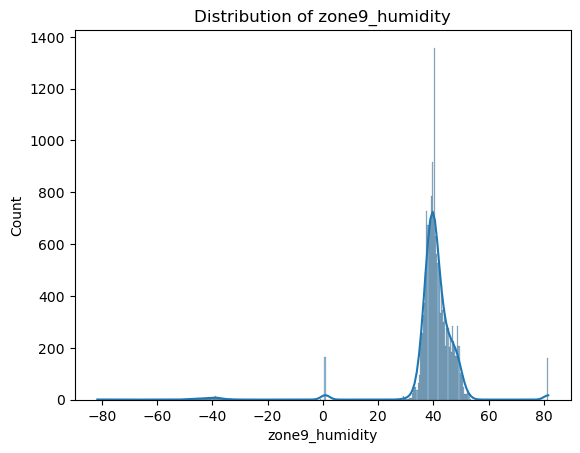

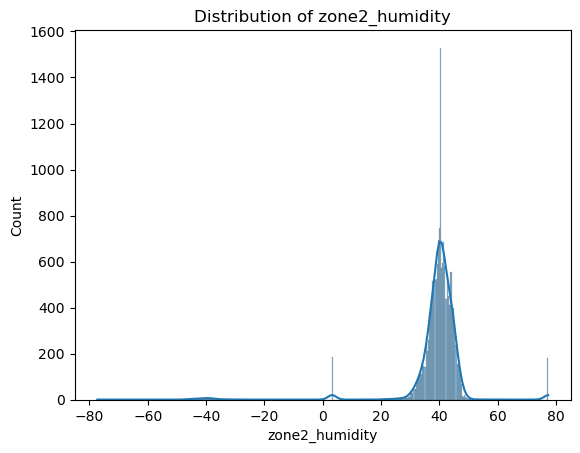

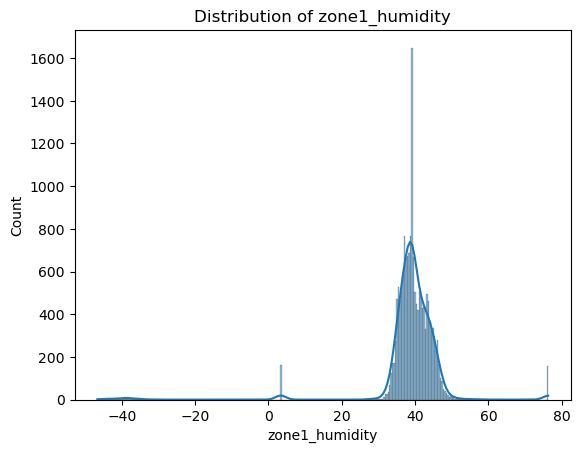

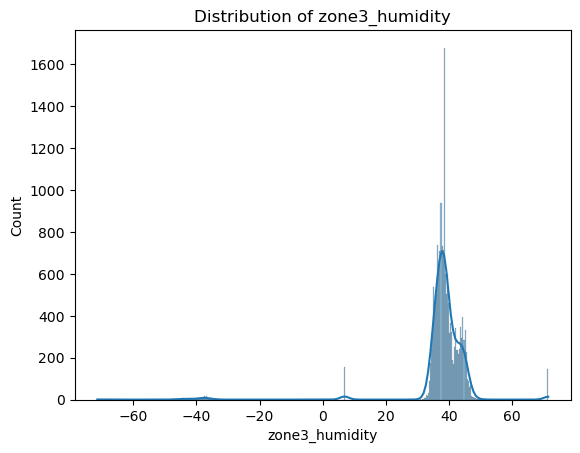

In [10]:
for col in skewed_features.index:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

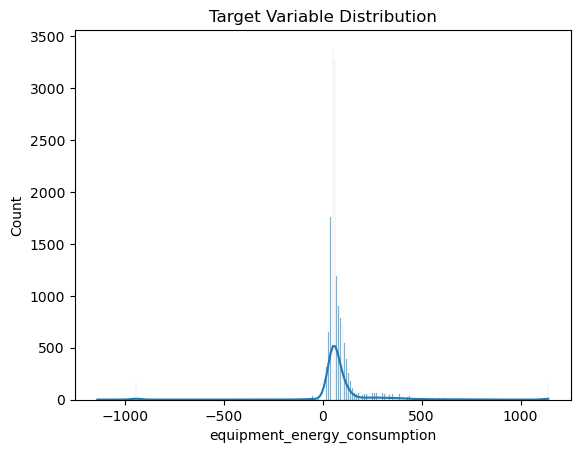

Skewness of target: 0.6633498651643432


In [11]:
sns.histplot(df['equipment_energy_consumption'], kde=True)
plt.title("Target Variable Distribution")
plt.show()

print("Skewness of target:", skew(df['equipment_energy_consumption']))

/Users/avantikagaur/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


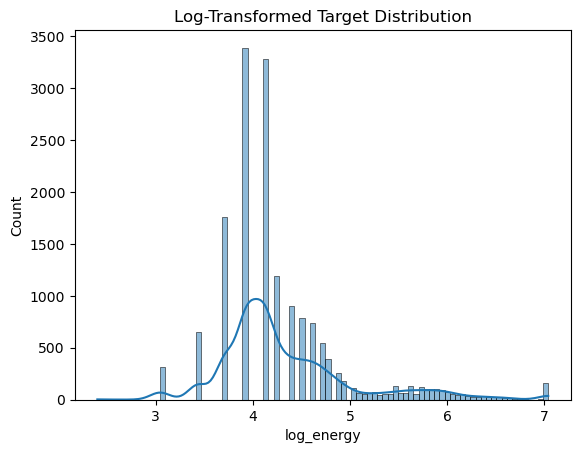

In [12]:
# Try log transformation
df['log_energy'] = np.log1p(df['equipment_energy_consumption'])
sns.histplot(df['log_energy'], kde=True)
plt.title("Log-Transformed Target Distribution")
plt.show()

<b> Outlier Detection (IQR Method) </b>

In [13]:
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[feature] < lower) | (data[feature] > upper)]

outlier_counts = {col: len(detect_outliers_iqr(df, col)) for col in df.columns}  #for counting outliers
outlier_counts = {k: v for k, v in outlier_counts.items() if v > 0}
print("Outliers detected:")
print(outlier_counts)

Outliers detected:
{'equipment_energy_consumption': 2297, 'lighting_energy': 4174, 'zone1_temperature': 749, 'zone1_humidity': 560, 'zone2_temperature': 652, 'zone2_humidity': 702, 'zone3_temperature': 443, 'zone3_humidity': 530, 'zone4_temperature': 609, 'zone4_humidity': 552, 'zone5_temperature': 355, 'zone5_humidity': 1572, 'zone6_temperature': 537, 'zone6_humidity': 450, 'zone7_temperature': 359, 'zone7_humidity': 581, 'zone8_temperature': 504, 'zone8_humidity': 570, 'zone9_temperature': 342, 'zone9_humidity': 656, 'outdoor_temperature': 463, 'atmospheric_pressure': 513, 'outdoor_humidity': 706, 'wind_speed': 451, 'visibility_index': 2521, 'dew_point': 358, 'random_variable1': 363, 'random_variable2': 335, 'month': 9, 'log_energy': 1202}


In [14]:
outlier_indices = set()   #indices of all rows with outlier
for col in outlier_counts:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_indices.update(df[(df[col] < lower) | (df[col] > upper)].index)

df = df.drop(index=outlier_indices).reset_index(drop=True)

In [15]:
df.fillna(df.median(), inplace=True)

<b> Correlation Heatmap </b>

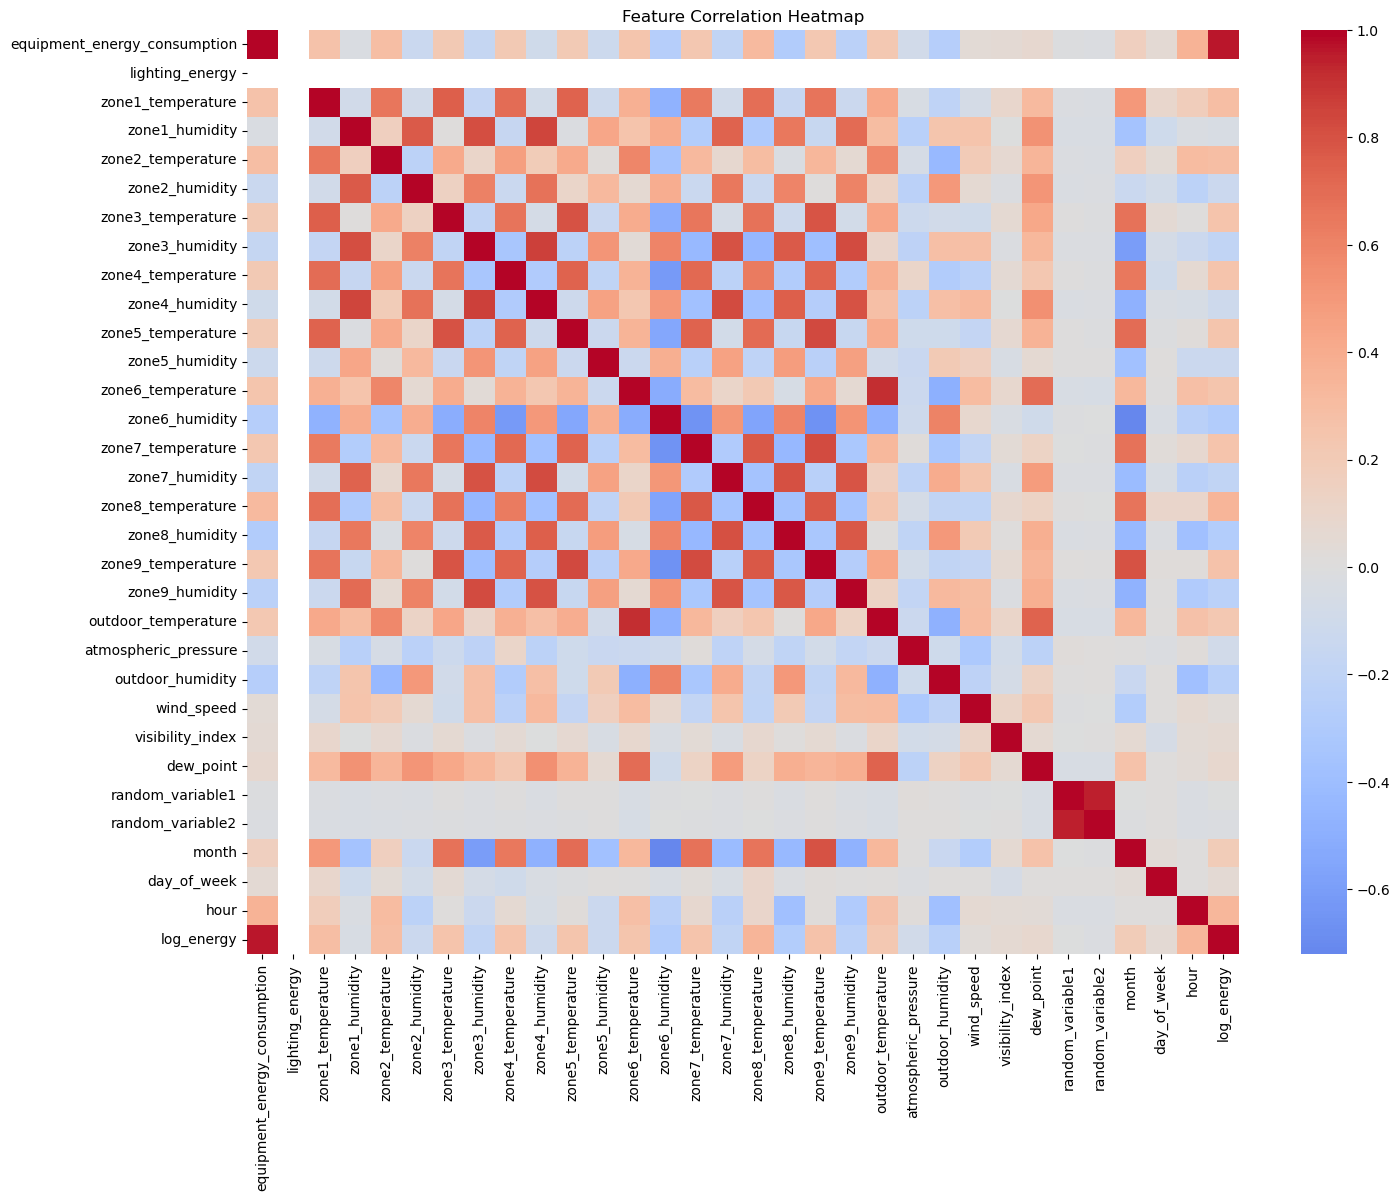

In [16]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

<b> Feature Engineering </b>

In [17]:
correlation_matrix = df.corr()
target_corr = correlation_matrix['equipment_energy_consumption']
print(target_corr[['random_variable1', 'random_variable2', 'day_of_week',]])

random_variable1   -0.013719
random_variable2   -0.021478
day_of_week         0.049309
Name: equipment_energy_consumption, dtype: float64


In [18]:
df.drop(columns=["random_variable1", "random_variable2", "lighting_energy", "day_of_week" ], inplace=True)

<b> Generation of temporal features </b>

In [19]:
# Generation of interaction features
df['temp_humidity_interaction'] = df['outdoor_temperature'] * df['outdoor_humidity']
df['zone1_temp_humidity_interaction'] = df['zone1_temperature'] * df['zone1_humidity']
df['zone2_temp_humidity_interaction'] = df['zone2_temperature'] * df['zone2_humidity']

# Generation of rolling mean features
df['zone1_temp_rolling_mean'] = df['zone1_temperature'].rolling(window=10).mean()
df['zone2_humidity_rolling_mean'] = df['zone2_humidity'].rolling(window=10).mean()

# Generation of lag features
df['energy_consumption_lag1'] = df['equipment_energy_consumption'].shift(1)
df['energy_consumption_lag2'] = df['equipment_energy_consumption'].shift(2)

# Interaction with external weather conditions
df['outdoor_temp_pressure_interaction'] = df['outdoor_temperature'] * df['atmospheric_pressure']
df['outdoor_humidity_wind_interaction'] = df['outdoor_humidity'] * df['wind_speed']

# Grouping of each zone column and map the mean energy consumption
df['zone1_encoded'] = df.groupby('zone1_temperature')['equipment_energy_consumption'].transform('mean')
df['zone2_encoded'] = df.groupby('zone2_temperature')['equipment_energy_consumption'].transform('mean')
df['zone3_encoded'] = df.groupby('zone3_temperature')['equipment_energy_consumption'].transform('mean')
df['zone4_encoded'] = df.groupby('zone4_temperature')['equipment_energy_consumption'].transform('mean')
df['zone5_encoded'] = df.groupby('zone5_temperature')['equipment_energy_consumption'].transform('mean')
df['zone6_encoded'] = df.groupby('zone6_temperature')['equipment_energy_consumption'].transform('mean')
df['zone7_encoded'] = df.groupby('zone7_temperature')['equipment_energy_consumption'].transform('mean')
df['zone8_encoded'] = df.groupby('zone8_temperature')['equipment_energy_consumption'].transform('mean')
df['zone9_encoded'] = df.groupby('zone9_temperature')['equipment_energy_consumption'].transform('mean')

<b> Finding PCA of correlated features </b>

In [20]:
def apply_pca(df, feature_list, n_components=2, prefix="pca"):
    subset = df[feature_list]
    imputer = SimpleImputer(strategy="mean") 
    imputed = imputer.fit_transform(subset)   
    scaler = StandardScaler()     # Standardization
    scaled = scaler.fit_transform(imputed)
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(scaled)
    for i in range(n_components):
        df[f"{prefix}_{i+1}"] = components[:, i]
    return df

In [21]:
zone_temp_features = [f'zone{i}_temperature' for i in range(1, 10)]  
df = apply_pca(df, zone_temp_features, prefix="pca_zone_temp")

zone_humidity_features = [f'zone{i}_humidity' for i in range(1, 10)]
df = apply_pca(df, zone_humidity_features, prefix="pca_zone_humidity")

weather_features = ['outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity','wind_speed', 'visibility_index', 'dew_point']
df = apply_pca(df, weather_features, prefix="pca_weather")


temporal_features = ['zone1_temp_rolling_mean', 'zone2_humidity_rolling_mean', 'energy_consumption_lag1', 'energy_consumption_lag2',]
df = apply_pca(df, temporal_features, prefix="pca_temporal")

interaction_features = ['temp_humidity_interaction', 'zone1_temp_humidity_interaction','zone2_temp_humidity_interaction', 'outdoor_temp_pressure_interaction','outdoor_humidity_wind_interaction']
df = apply_pca(df, interaction_features, prefix="pca_interaction")

<b> Feature Selection </b>

In [22]:
X = df.drop(columns=['equipment_energy_consumption', 'log_energy'])
y = df['log_energy']

In [23]:
X = X.loc[y.index]  
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index]

In [24]:
MI_scores = mutual_info_regression(X, y)
MI_series = pd.Series(MI_scores, index=X.columns).sort_values(ascending=False)

In [25]:
top_features = mi_series.head(10).index.tolist()
X_top = X[top_features]

NameError: name 'mi_series' is not defined

<b>Train & Test Split </b>

In [ ]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

<b> Linear regression with L2 regularization </b>

In [ ]:
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

print("Ridge Regression with Hyperparameter Tuning: ")
print("Best alpha:", ridge_grid.best_params_['alpha'])
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))

<b> Random Forest Regression </b>

In [ ]:
rf_params = {'n_estimators': [20,40,60,80,100],'max_depth': [5, 10, None],'min_samples_split': [2, 5, 7],}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Random Forest Regressor with Hyperparameter Tuning: ")
print("Best Params:", rf_grid.best_params_)
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))